In [ ]:
pip install easyocr

     |████████████████████████████████| 63.6 MB 20 kB/s 
     |████████████████████████████████| 37.1 MB 48 kB/s 


In [ ]:
pip install imutils

In [ ]:
import cv2
from matplotlib import pyplot as plt 
import numpy as np
import imutils
import easyocr

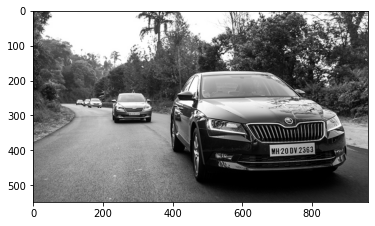

In [ ]:
img = cv2.imread('car4.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

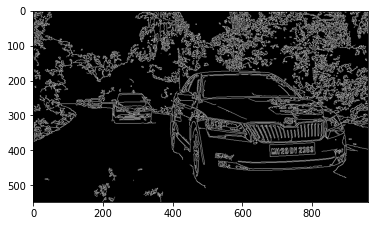

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)  #Noise Reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [ ]:
location

array([[[807, 380]],

       [[678, 384]],

       [[679, 418]],

       [[808, 411]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

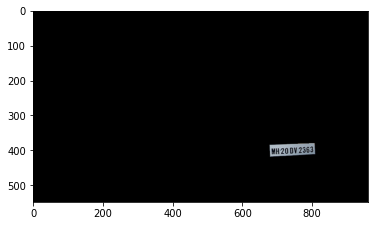

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x, y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

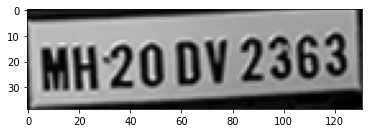

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [ ]:
result

[([[0, 4], [131, 4], [131, 37], [0, 37]], 'MH20 DV 2363', 0.5435011630275409)]

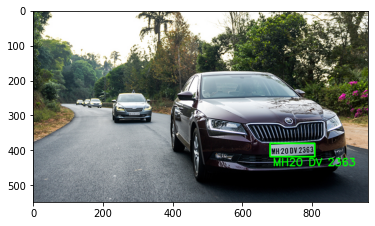

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX 
res = cv2.putText(img, text=text, org=(approx[0][0][0]-120, approx[1][0][1]+60), fontFace=font, fontScale=1,color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res=cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))